In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('weather_data_hochiminh_2020.csv', parse_dates=True)
data.drop(columns=['snow','wpgt','tsun'], inplace= True)

#print('Shape of data:', data.shape)

data.head()

,time,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2000-01-01,26.6,22.4,32.8,NaN,NaN,NaN,NaN
1,2000-01-02,27.2,22.6,32.9,0.0,NaN,NaN,NaN
2,2000-01-03,27.8,22.7,32.6,0.0,NaN,NaN,NaN
3,2000-01-04,27.1,23.7,NaN,NaN,NaN,NaN,NaN
4,2000-01-05,28.2,23.6,32.7,0.0,NaN,NaN,NaN


In [3]:
data.shape

(7671, 8)

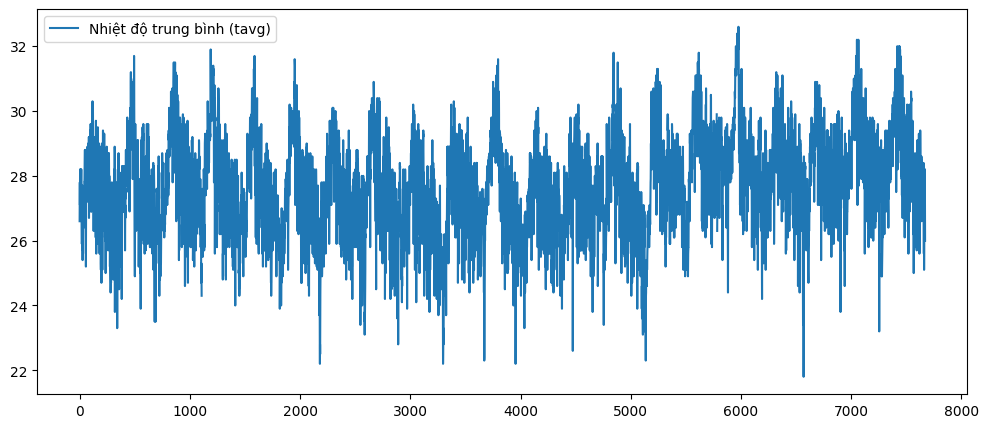

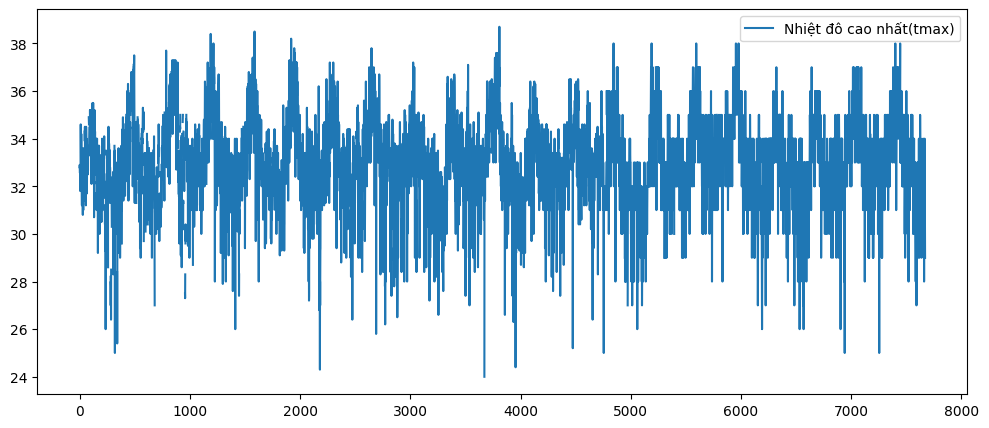

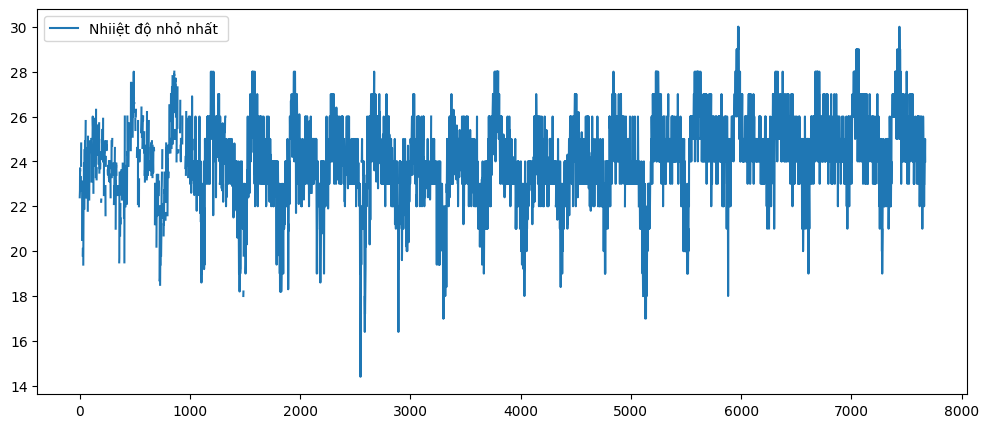

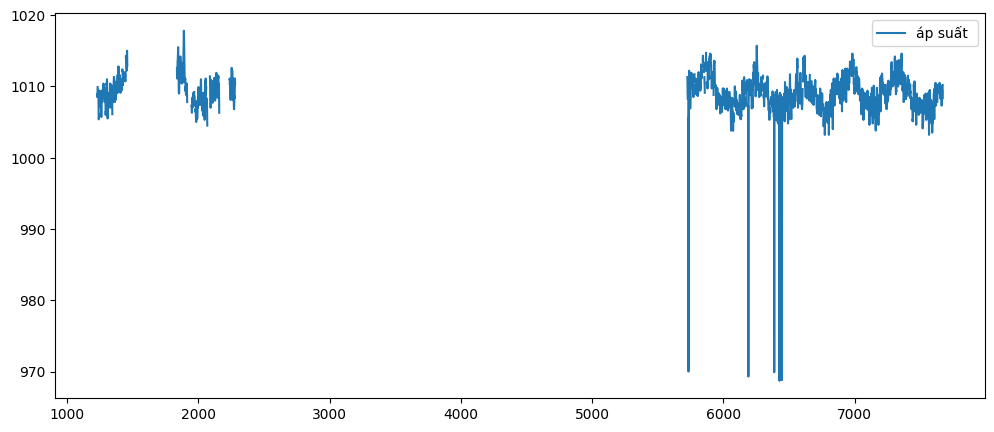

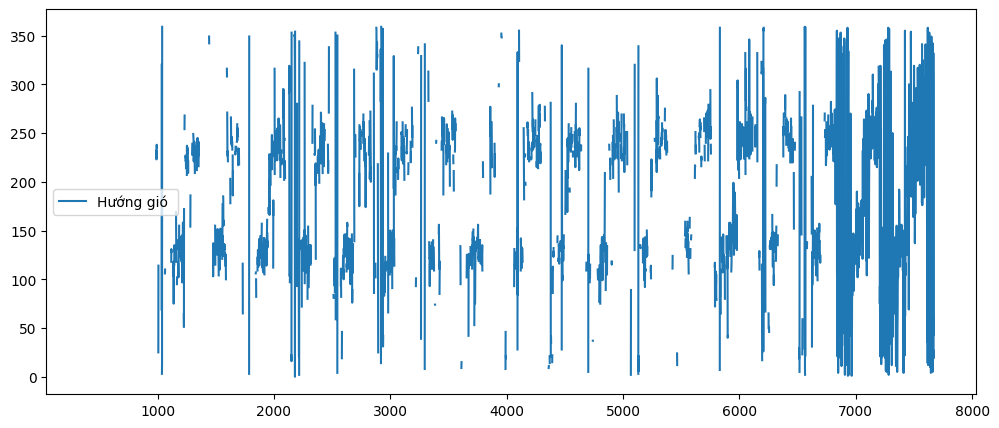

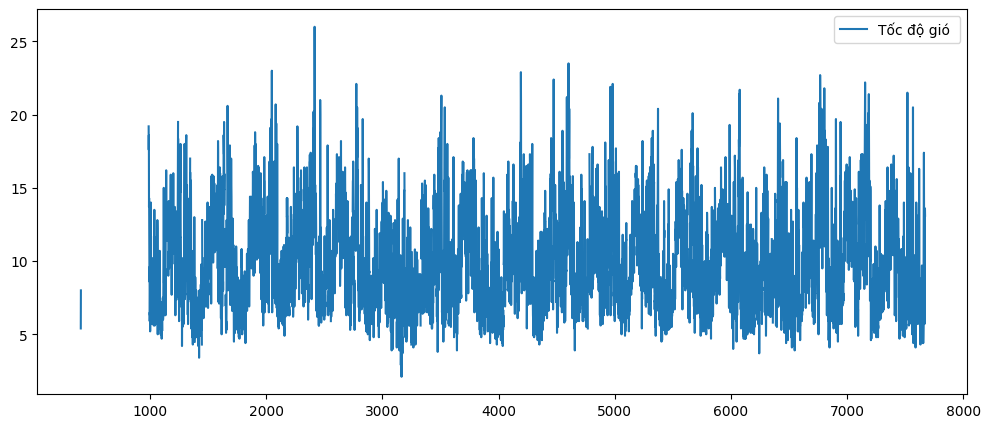

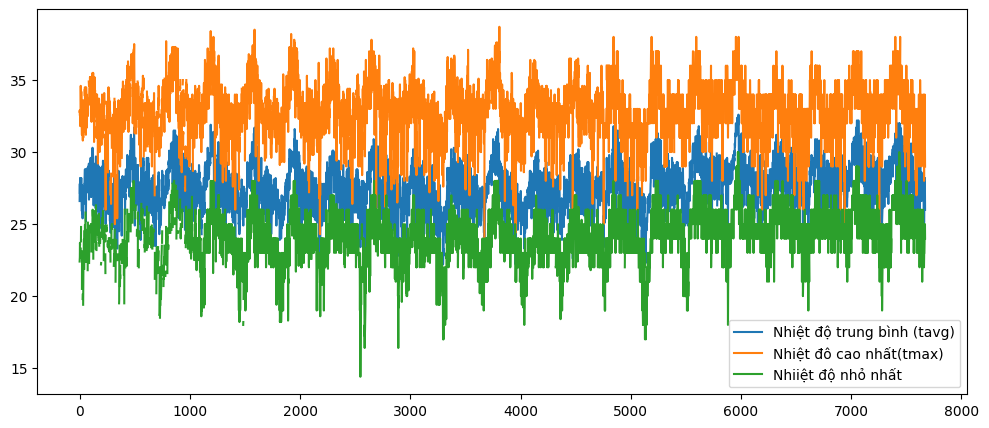

In [4]:
plt.figure(figsize=(12,5))

data['tavg'].plot( label = 'Nhiệt độ trung bình (tavg)')

plt.legend()
plt.show()
plt.figure(figsize=(12,5))
data['tmax'].plot( label = 'Nhiệt đô cao nhất(tmax)')

plt.legend()
plt.show()
plt.figure(figsize=(12,5))
data['tmin'].plot( label = 'Nhiiệt độ nhỏ nhất ')

plt.legend()
plt.show()
plt.figure(figsize=(12,5))
data['pres'].plot( label = 'áp suất ')

plt.legend()
plt.show()
plt.figure(figsize=(12,5))
data['wdir'].plot( label = 'Hướng gió ')

plt.legend()
plt.show()
plt.figure(figsize=(12,5))
data['wspd'].plot( label = 'Tốc độ gió ')

plt.legend()
plt.show()
plt.figure(figsize=(12,5))

data['tavg'].plot( label = 'Nhiệt độ trung bình (tavg)')
data['tmax'].plot( label = 'Nhiệt đô cao nhất(tmax)')
data['tmin'].plot( label = 'Nhiiệt độ nhỏ nhất ')

plt.legend()
plt.show()



In [5]:
# Kiểm tra toàn bộ DataFrame

# Hoặc kiểm tra riêng cột exog
data.isna().sum()


time       0
tavg       7
tmin     541
tmax     196
prcp    6366
wdir    4435
wspd    1111
pres    5260
dtype: int64

In [25]:
tavg_consumed = data['tavg'].median()
tmin_consumed = data['tmin'].median()
tmax_consumed = data['tmax'].median()
prcp_consumed = data['prcp'].median()
wdir_consumed = data['wdir'].median()
wspd_consumed = data['wspd'].median()
pres_consumed = data['pres'].median()

data['tavg'].fillna(tavg_consumed, inplace=True)
data['tmin'].fillna(tmin_consumed, inplace=True)
data['tmax'].fillna(tmax_consumed, inplace=True)
data['prcp'].fillna(prcp_consumed, inplace=True)
data['wdir'].fillna(wdir_consumed, inplace=True)
data['wspd'].fillna(wspd_consumed, inplace=True)
data['pres'].fillna(pres_consumed, inplace=True)


In [7]:
# Kiểm tra toàn bộ DataFrame

# Hoặc kiểm tra riêng cột exog
data.isna().sum()


time    0
tavg    0
tmin    0
tmax    0
prcp    0
wdir    0
wspd    0
pres    0
dtype: int64

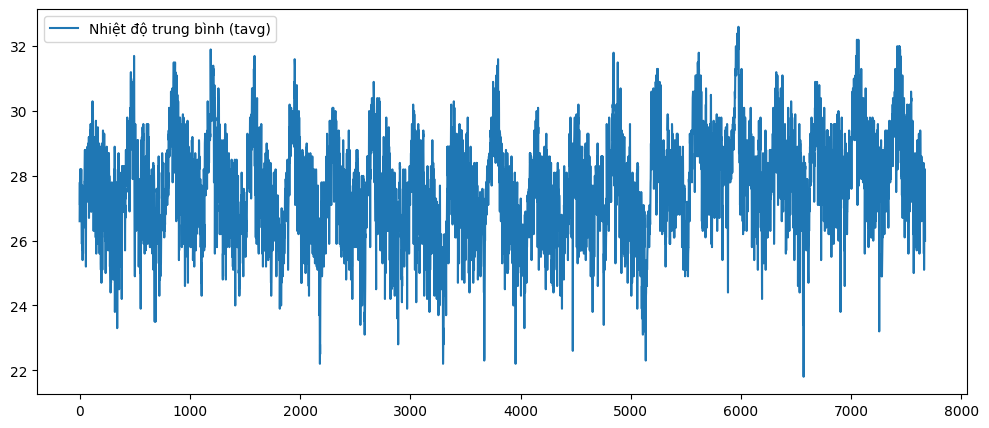

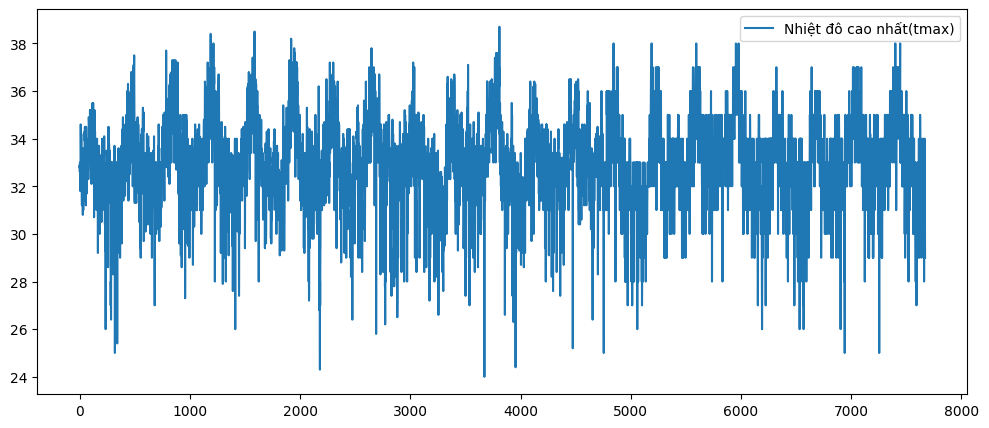

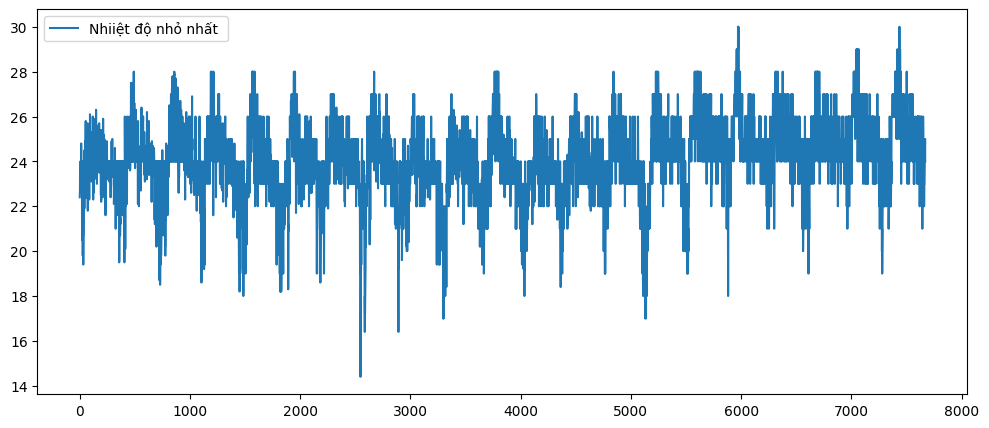

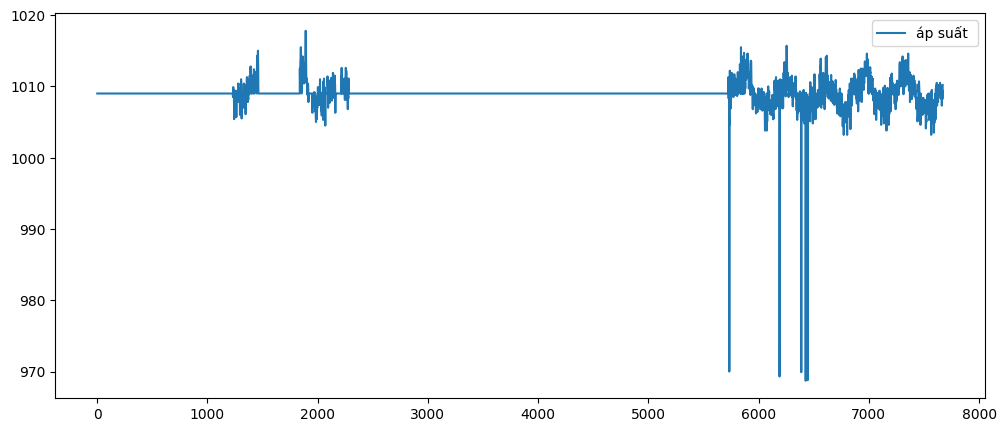

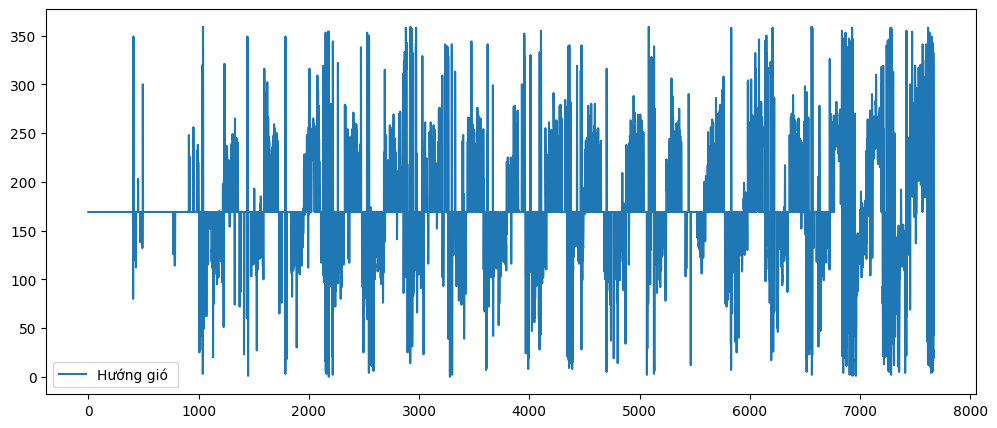

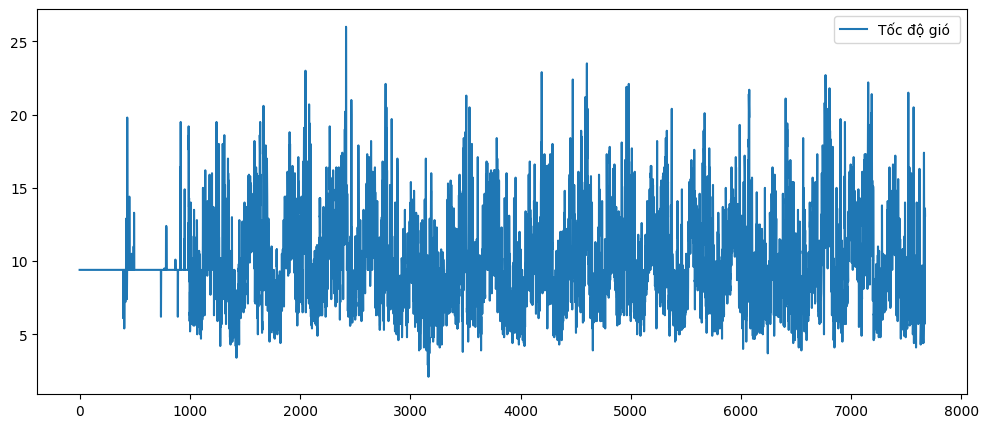

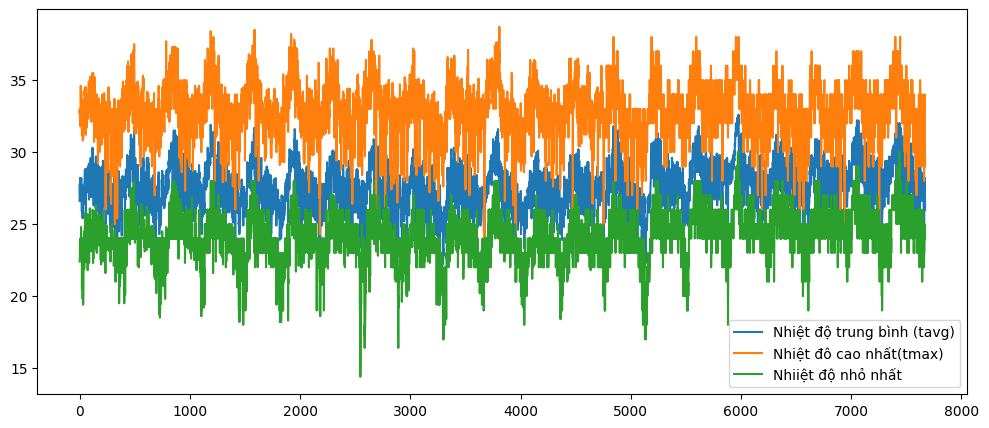

In [8]:
plt.figure(figsize=(12,5))

data['tavg'].plot( label = 'Nhiệt độ trung bình (tavg)')

plt.legend()
plt.show()
plt.figure(figsize=(12,5))
data['tmax'].plot( label = 'Nhiệt đô cao nhất(tmax)')

plt.legend()
plt.show()
plt.figure(figsize=(12,5))
data['tmin'].plot( label = 'Nhiiệt độ nhỏ nhất ')

plt.legend()
plt.show()
plt.figure(figsize=(12,5))
data['pres'].plot( label = 'áp suất ')

plt.legend()
plt.show()
plt.figure(figsize=(12,5))
data['wdir'].plot( label = 'Hướng gió ')

plt.legend()
plt.show()
plt.figure(figsize=(12,5))
data['wspd'].plot( label = 'Tốc độ gió ')

plt.legend()
plt.show()
plt.figure(figsize=(12,5))

data['tavg'].plot( label = 'Nhiệt độ trung bình (tavg)')
data['tmax'].plot( label = 'Nhiệt đô cao nhất(tmax)')
data['tmin'].plot( label = 'Nhiiệt độ nhỏ nhất ')

plt.legend()
plt.show()



In [9]:
import pandas as pd

# Đảm bảo rằng `date` là chỉ mục thời gian
data['time'] = pd.to_datetime(data['time'])
data = data.set_index('time')

# Chọn dữ liệu từ các năm trước (ví dụ đến cuối năm 2020)
train_data = data[:'2020']


In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Định nghĩa biến mục tiêu và biến ngoại sinh
endog = train_data['tavg']
exog = train_data[['pres', 'tmin', 'tmax', 'wdir', 'wspd']]

# Khởi tạo mô hình SARIMAX với các thông số ARIMA và yếu tố mùa vụ (cần thử nghiệm để tìm bộ thông số tối ưu)
model = SARIMAX(endog, exog=exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# In tóm tắt của mô hình
print(results.summary())


e:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
e:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
e:\Python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                               tavg   No. Observations:                 7671
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -7682.532
Date:                            Fri, 22 Nov 2024   AIC                          15385.065
Time:                                    12:49:29   BIC                          15454.500
Sample:                                01-01-2000   HQIC                         15408.883
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pres           0.0174      0.006      2.768      0.006       0.005       0.030
tmin           0.3060      0.007   

RMSE: 0.6797084395912443


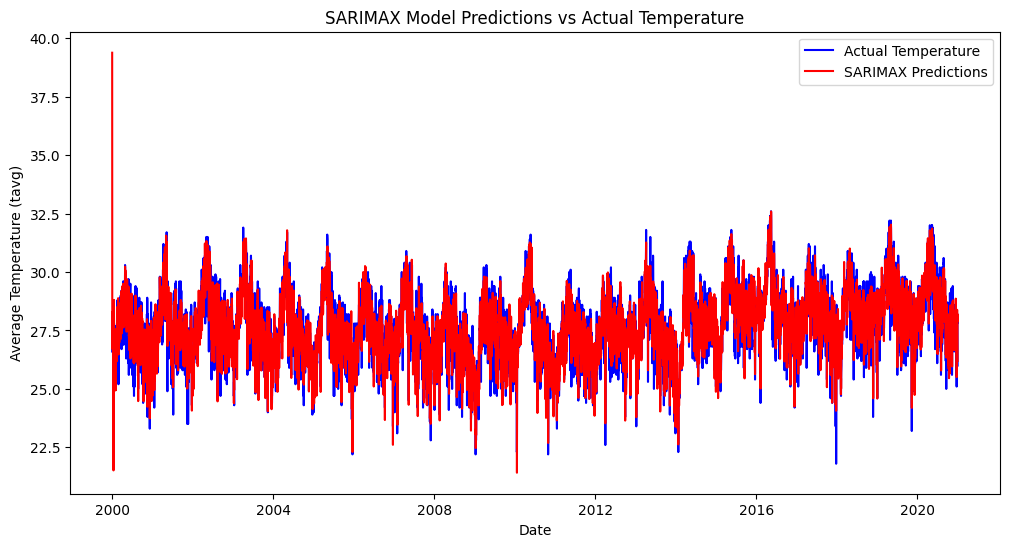

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

# Dự đoán cho tập huấn luyện để kiểm tra độ chính xác của mô hình
train_predictions = results.predict(start=train_data.index[0], end=train_data.index[-1], exog=exog)

# Tính RMSE
# Kiểm tra giá trị NaN
if train_data['tavg'].isnull().sum() == 0 and len(train_predictions) == len(train_data['tavg']):
    rmse = sqrt(mean_squared_error(train_data['tavg'], train_predictions))
    print(f'RMSE: {rmse}')
else:
    print("Dữ liệu có vấn đề: thiếu giá trị hoặc không khớp chiều.")

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# Dữ liệu thực tế
plt.plot(train_data.index, train_data['tavg'], label='Actual Temperature', color='blue')

# Dự đoán của mô hình
plt.plot(train_data.index, train_predictions, label='SARIMAX Predictions', color='red')

plt.xlabel('Date')
plt.ylabel('Average Temperature (tavg)')
plt.title('SARIMAX Model Predictions vs Actual Temperature')
plt.legend()
plt.show()


In [21]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [22]:
from statsmodels.tsa.arima.model import ARIMA

model2=ARIMA(endog,order=(1,1,1))
model2=model2.fit()
data.tail()

e:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
e:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
e:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,tavg,tmin,tmax,prcp,wdir,wspd,pres
time,,,,,,,
2020-12-27,27.8,24.0,34.0,0.0,332.0,6.7,1009.2
2020-12-28,27.8,24.0,33.0,0.0,297.0,6.2,1008.2
2020-12-29,28.2,25.0,33.0,0.0,19.0,7.5,1008.4
2020-12-30,26.9,25.0,30.0,0.0,27.0,13.6,1009.0
2020-12-31,26.0,24.0,29.0,0.0,25.0,13.1,1010.2


In [23]:

index_future_dates=pd.date_range(start='2020-12-30',end='2021-01-29')

pred=model2.predict(start=len(data),end=len(data)+30,typ='levels').rename('ARIMA Predictions')

pred.index=index_future_dates
print(pred)

2020-12-30    26.564752
2020-12-31    26.843591
2021-01-01    26.981263
2021-01-02    27.049237
2021-01-03    27.082798
2021-01-04    27.099368
2021-01-05    27.107549
2021-01-06    27.111589
2021-01-07    27.113583
2021-01-08    27.114568
2021-01-09    27.115054
2021-01-10    27.115294
2021-01-11    27.115413
2021-01-12    27.115471
2021-01-13    27.115500
2021-01-14    27.115514
2021-01-15    27.115521
2021-01-16    27.115525
2021-01-17    27.115527
2021-01-18    27.115528
2021-01-19    27.115528
2021-01-20    27.115528
2021-01-21    27.115528
2021-01-22    27.115528
2021-01-23    27.115528
2021-01-24    27.115528
2021-01-25    27.115528
2021-01-26    27.115528
2021-01-27    27.115528
2021-01-28    27.115528
2021-01-29    27.115528
Freq: D, Name: ARIMA Predictions, dtype: float64


e:\Python\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

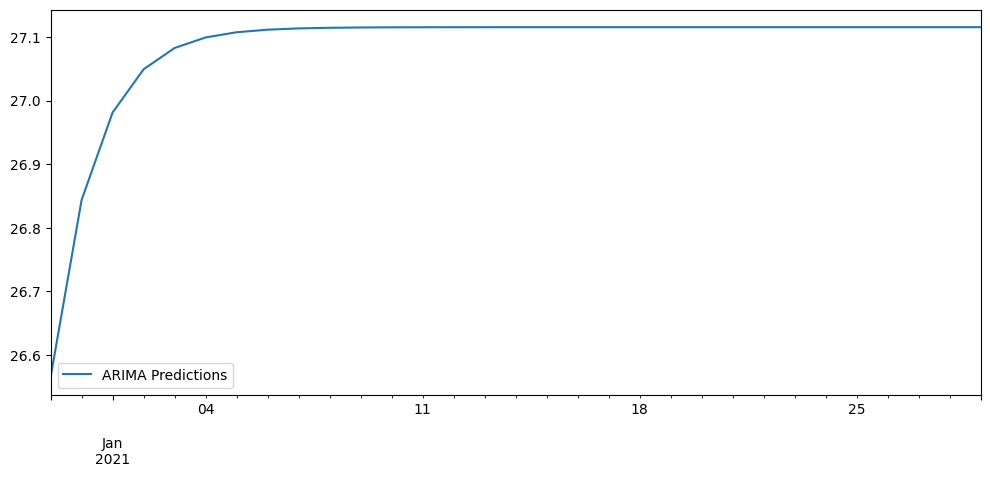

In [24]:
pred.plot(figsize=(12,5),legend=True)